In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
users_data = pd.read_pickle("../data/users_data_final.pkl")

In [3]:
users_data.head()

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile


In [4]:
users_data.shape

(45209, 19)

In [5]:
users_data.shape[1]

19

In [6]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

In [7]:
users_data.describe()

,number_transactions,total_amount_usd,age,duration,campaign,pdays,previous
count,35210.000000,35210.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000
mean,3.977052,1369.417751,40.935853,258.153067,2.763897,40.199651,0.580349
std,3.814329,3063.412688,10.618653,257.525446,3.098076,100.130586,2.303489
min,1.000000,-8019.000000,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,2.000000,73.000000,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,3.000000,451.000000,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,4.000000,1438.000000,48.000000,319.000000,3.000000,-1.000000,0.000000
max,20.000000,102127.000000,95.000000,4918.000000,63.000000,871.000000,275.000000


C:\Users\guilh\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

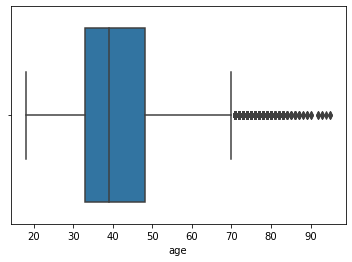

In [8]:
sns.boxplot(users_data.age)

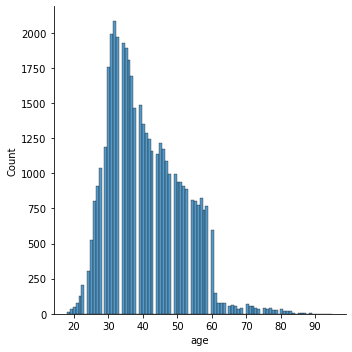

In [9]:
sns.displot(users_data.age)

In [10]:
users_data.drop(['date_joined'], axis = 1, inplace = True)

In [11]:
categorical_cols = list(users_data.select_dtypes(['object']).columns)

In [12]:
categorical_cols

['user_id', 'job', 'marital', 'education', 'contact', 'poutcome', 'device']

In [13]:
users_data.drop(categorical_cols, axis = 1, inplace = True)

In [14]:
users_data.isnull().sum()

number_transactions    9999
total_amount_usd       9999
age                       0
default                   0
housing                   0
loan                      0
duration                  0
campaign                  0
pdays                     0
previous                  0
term_deposit              0
dtype: int64

In [15]:
users_data.number_transactions.fillna(0, inplace=True)

In [16]:
users_data.total_amount_usd.fillna(0, inplace=True)


In [17]:
users_data.isnull().sum()

number_transactions    0
total_amount_usd       0
age                    0
default                0
housing                0
loan                   0
duration               0
campaign               0
pdays                  0
previous               0
term_deposit           0
dtype: int64

In [18]:
target = users_data.total_amount_usd

In [19]:
features = users_data.drop(['total_amount_usd'], axis = 1)

In [20]:
from sklearn.model_selection import train_test_split

